In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations, product
from package.saveload import *

# Outer part and Inner layers

In [2]:
vertices = np.array(list(permutations([0, 1, 2], 3)))
vertices = np.concatenate([vertices*np.array(i) for i in product([1, -1], repeat=3)])
vertices = 0.5*np.unique(vertices, axis=0)
vertices

array([[-1. , -0.5,  0. ],
       [-1. ,  0. , -0.5],
       [-1. ,  0. ,  0.5],
       [-1. ,  0.5,  0. ],
       [-0.5, -1. ,  0. ],
       [-0.5,  0. , -1. ],
       [-0.5,  0. ,  1. ],
       [-0.5,  1. ,  0. ],
       [ 0. , -1. , -0.5],
       [ 0. , -1. ,  0.5],
       [ 0. , -0.5, -1. ],
       [ 0. , -0.5,  1. ],
       [ 0. ,  0.5, -1. ],
       [ 0. ,  0.5,  1. ],
       [ 0. ,  1. , -0.5],
       [ 0. ,  1. ,  0.5],
       [ 0.5, -1. ,  0. ],
       [ 0.5,  0. , -1. ],
       [ 0.5,  0. ,  1. ],
       [ 0.5,  1. ,  0. ],
       [ 1. , -0.5,  0. ],
       [ 1. ,  0. , -0.5],
       [ 1. ,  0. ,  0.5],
       [ 1. ,  0.5,  0. ]])

In [3]:
dists = np.linalg.norm(np.array([vertices for i in vertices]) - np.array([vertices for i in vertices]).transpose([1, 0, 2]), axis=-1)
edges_05sqrt2 = np.array(np.where(dists == 0.5* 2**0.5)).transpose()

edges = np.concatenate([edges_05sqrt2, ])

In [4]:
len(vertices), len(edges)

(24, 72)

/tmp/ipykernel_3901/2203189743.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


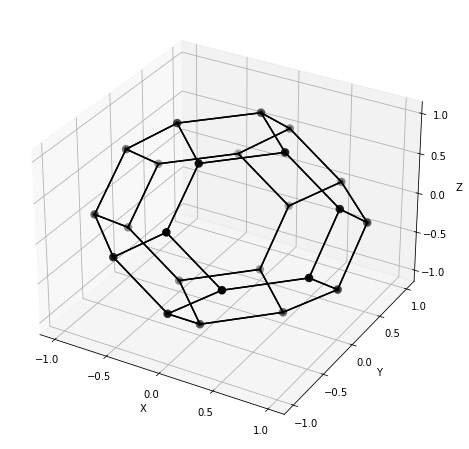

In [16]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black', linewidth=4)
for edge in edges:
    p0 = vertices[edge[0]]
    p1 = vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [17]:
outer_vertices = np.array([[ 0.0, -0.5, -1.0], 
                           [ 0.0,  0.5, -1.0],
                           [ 0.0, -0.5,  1.0], 
                           [ 0.0,  0.5,  1.0],
                           [ 0.5, -1.0,  0.0],
                           [-0.5, -1.0,  0.0],
                           [ 0.5,  1.0,  0.0],
                           [-0.5,  1.0,  0.0], 
                           [-1.0,  0.0,  0.5], 
                           [-1.0,  0.0, -0.5], 
                           [ 1.0,  0.0,  0.5], 
                           [ 1.0,  0.0, -0.5]])
inner_vertices = []
for v in vertices:
    if not(tuple(v) in [tuple(i) for i in outer_vertices]):
        inner_vertices.append(v)
inner_vertices = np.array(inner_vertices)
    
len(vertices), len(inner_vertices), len(outer_vertices)

(24, 12, 12)

/tmp/ipykernel_3901/1364822209.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


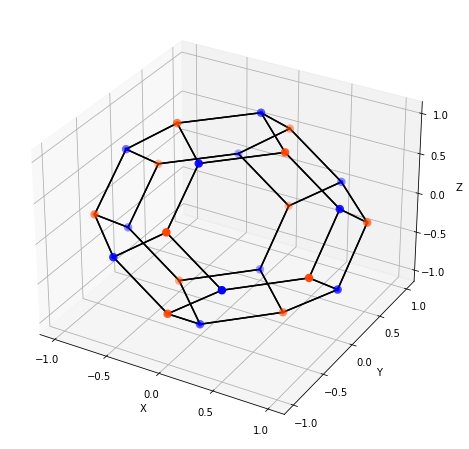

In [18]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(outer_vertices[:, 0], outer_vertices[:, 1], outer_vertices[:, 2], color='blue', linewidth=4)
ax.scatter(inner_vertices[:, 0], inner_vertices[:, 1], inner_vertices[:, 2], color='orangered', linewidth=4)
for edge in edges:
    p0 = vertices[edge[0]]
    p1 = vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [19]:
dist_out = np.min(np.linalg.norm(inner_vertices - outer_vertices[0], axis=-1))

outer_polygons = []
for vertex in outer_vertices:
    polygon = inner_vertices[np.linalg.norm(inner_vertices - vertex, axis=-1) == dist_out]
    polygon = np.concatenate([[vertex], polygon])
    outer_polygons.append(polygon)
outer_polygons = np.array(outer_polygons)
outer_polygons.shape

(12, 4, 3)

In [20]:
dists_inner_matrix = np.linalg.norm(np.array([inner_vertices for i in inner_vertices]) - np.array([inner_vertices for i in inner_vertices]).transpose([1, 0, 2]), axis=-1)
dists_inner = np.unique(dists_inner_matrix)
inner_edges = np.array(np.where(np.logical_or(dists_inner_matrix == dists_inner[1], dists_inner_matrix == dists_inner[2]))).transpose()

/tmp/ipykernel_3901/1183917936.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


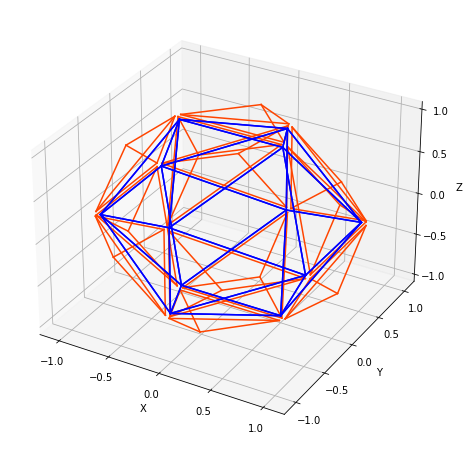

In [21]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

for polygon in outer_polygons:
    radius = polygon[0] / np.linalg.norm(polygon[0])
    that_polygon = polygon + 0.05*radius
    for p0, p1 in combinations(that_polygon, 2):
        xs = [p0[0], p1[0]]
        ys = [p0[1], p1[1]]
        zs = [p0[2], p1[2]]
        ax.plot(xs, ys, zs, color='orangered')
    
for edge in inner_edges:
    p0 = inner_vertices[edge[0]]
    p1 = inner_vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [22]:
inner_layer_0 = np.array([[0.5, 0.0, -1.0]])
inner_layer_1 = inner_vertices[np.argsort(np.linalg.norm(inner_vertices - inner_layer_0[0], axis=1))[1:6]]
inner_layer_2 = -inner_layer_1
inner_layer_3 = -inner_layer_0
inner_layers = [inner_layer_0, inner_layer_1, inner_layer_2, inner_layer_3]
inner_layers_colors = ['red', 'yellow', 'green', 'blue']

/tmp/ipykernel_3901/3184953878.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


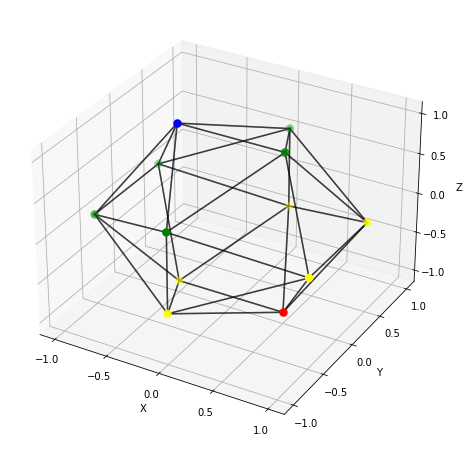

In [23]:
#%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
 
for edge in inner_edges:
    p0 = inner_vertices[edge[0]]
    p1 = inner_vertices[edge[1]]
    xs = [p0[0], p1[0]]
    ys = [p0[1], p1[1]]
    zs = [p0[2], p1[2]]
    ax.plot(xs, ys, zs, color='black', alpha=0.5)

for i in range(4):
    ax.scatter(inner_layers[i][:, 0], inner_layers[i][:, 1], inner_layers[i][:, 2], color=inner_layers_colors[i], linewidth=4)
    
    
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(np.arange(-1, 1.5, 0.5))
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_zticks(np.arange(-1, 1.5, 0.5))
fig.show()

In [24]:
inner_polygons_01 = np.array([[inner_layer_0[0], inner_layer_1[0], inner_layer_1[3], inner_layer_1[4]], 
                              [inner_layer_0[0], inner_layer_1[0], inner_layer_1[1], inner_layer_1[3]], 
                              [inner_layer_0[0], inner_layer_1[0], inner_layer_1[2], inner_layer_1[4]]])
inner_polygons_23 = np.array([[inner_layer_3[0], inner_layer_2[0], inner_layer_2[3], inner_layer_2[4]], 
                              [inner_layer_3[0], inner_layer_2[0], inner_layer_2[1], inner_layer_2[3]], 
                              [inner_layer_3[0], inner_layer_2[0], inner_layer_2[2], inner_layer_2[4]]])
assert(inner_polygons_01 == -inner_polygons_23).all()

inner_polygons_12a = np.array([[inner_layer_1[0], inner_layer_2[0], inner_layer_2[3], inner_layer_2[4]], 
                               [inner_layer_1[0], inner_layer_2[0], inner_layer_2[1], inner_layer_2[3]], 
                               [inner_layer_1[0], inner_layer_2[0], inner_layer_2[2], inner_layer_2[4]]])
inner_polygons_12b = np.array([[inner_layer_2[0], inner_layer_1[0], inner_layer_1[3], inner_layer_1[4]], 
                               [inner_layer_2[0], inner_layer_1[0], inner_layer_1[1], inner_layer_1[3]], 
                               [inner_layer_2[0], inner_layer_1[0], inner_layer_1[2], inner_layer_1[4]]])
assert (inner_polygons_12a == -inner_polygons_12b).all()

inner_polygons = np.concatenate([inner_polygons_01, inner_polygons_12a, inner_polygons_12b, inner_polygons_23])
inner_polygons.shape

(12, 4, 3)

In [25]:
polygons = np.concatenate([inner_polygons, outer_polygons])
polygons.shape

(24, 4, 3)

In [26]:
filename = "package/simplicial-representations/TruncatedOctahedron.csv"
save(polygons, filename)
assert(load(filename) == polygons).all()